In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
import requests, zipfile, io

In [4]:
# Скачивание архива с интернет-ресурса
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [5]:
# Просмотр архива
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

In [6]:
# Сохранение 'bank-full.csv' в DataFrame
df = pd.read_csv(z.open(str(z.namelist()[0])), sep=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43282,46,blue-collar,married,secondary,no,640,yes,no,cellular,12,mar,215,1,182,4,success,yes
37812,35,student,divorced,primary,no,2755,yes,no,cellular,14,may,177,2,345,3,other,no
9395,36,admin.,married,secondary,no,4785,no,yes,unknown,6,jun,250,1,-1,0,unknown,no
23174,33,technician,single,secondary,no,151,yes,no,cellular,27,aug,86,6,-1,0,unknown,no
15512,32,admin.,divorced,secondary,no,-46,no,yes,cellular,18,jul,1373,4,-1,0,unknown,yes
16141,40,management,married,tertiary,no,995,yes,no,cellular,22,jul,96,2,-1,0,unknown,no
25399,39,management,married,tertiary,no,3,yes,no,cellular,18,nov,341,1,-1,0,unknown,no
20617,49,blue-collar,married,secondary,no,553,no,no,cellular,12,aug,645,8,-1,0,unknown,yes
13553,45,admin.,married,secondary,no,1097,yes,yes,cellular,9,jul,180,1,-1,0,unknown,no
22497,50,admin.,married,primary,no,82,no,no,cellular,22,aug,101,4,-1,0,unknown,no


In [7]:
# изменение типа переменной (Литеральное обозначение месяца в его порядковый номер)
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int32

In [10]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

In [11]:
data

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766
5,6,5341
6,7,6895
7,8,6247
8,9,579
9,10,738


**Линейные графики**

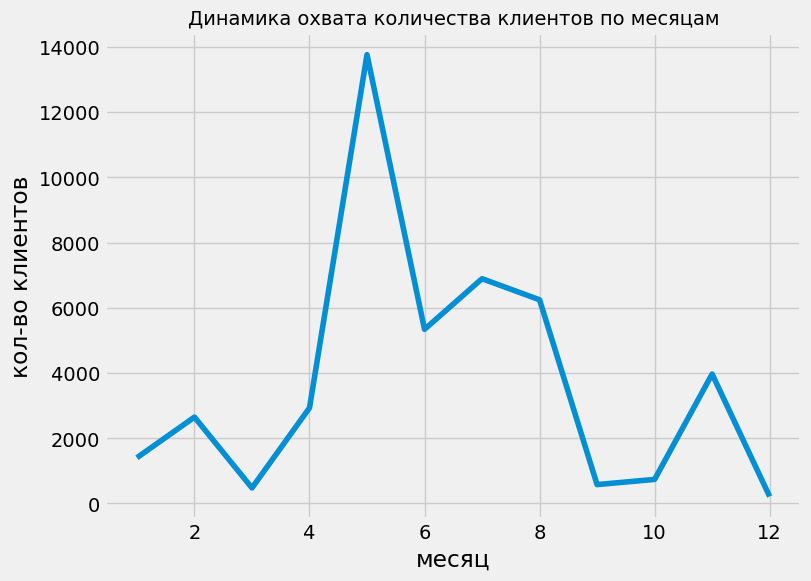

In [22]:
plt.figure(figsize=(8, 6))
plt.title('Динамика охвата количества клиентов по месяцам', fontsize=14)
plt.xlabel('месяц')
plt.ylabel('кол-во клиентов')

plt.plot(data['month'], data['count']);

In [24]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no


In [37]:
# Фильтрация данных по семейному положению
data1 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data2 = df[df['marital'] == 'married'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

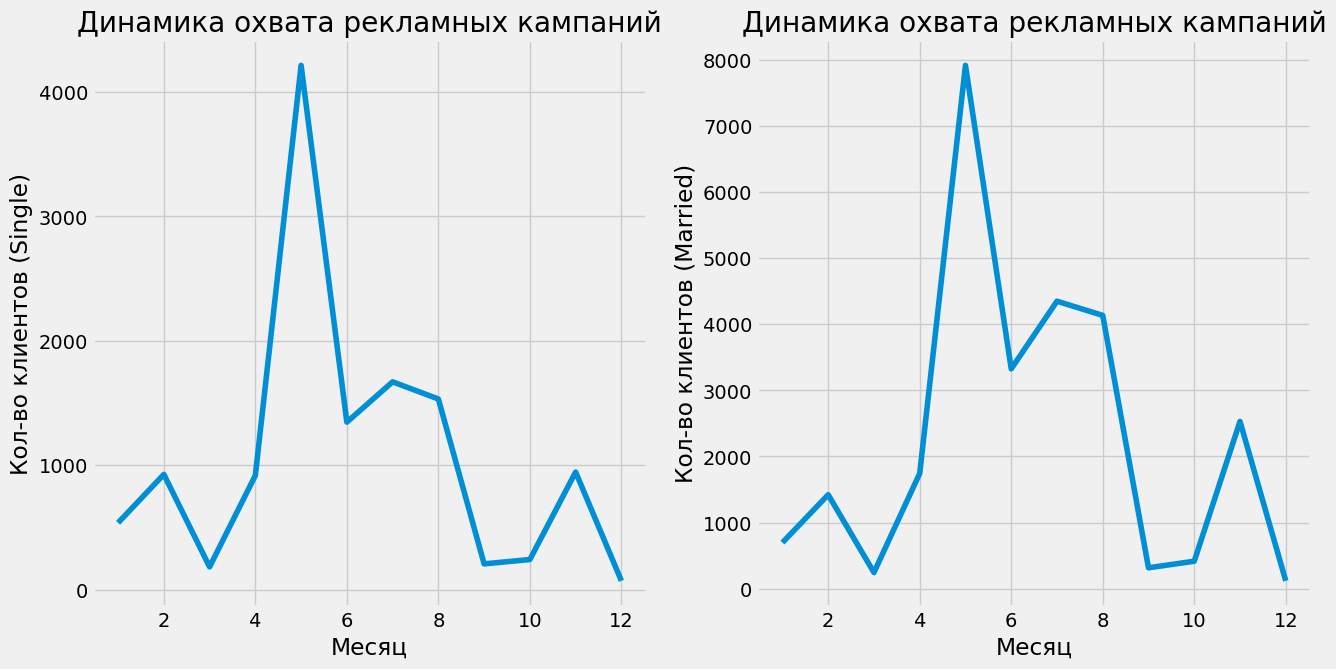

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].plot(data1['month'], data1['count'])
ax[0].set_title('Динамика охвата рекламных кампаний')
ax[0].set_xlabel('Месяц')
ax[0].set_ylabel('Кол-во клиентов (Single)')

ax[1].plot(data2['month'], data2['count'])
ax[1].set_title('Динамика охвата рекламных кампаний')
ax[1].set_xlabel('Месяц')
ax[1].set_ylabel('Кол-во клиентов (Married)');

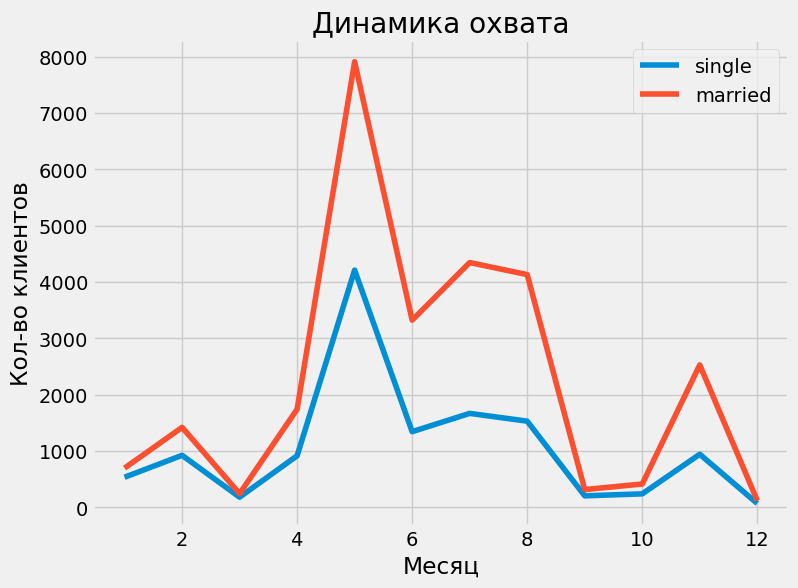

In [57]:
plt.figure(figsize=(8, 6))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single', 'married'])

**Гистограмма**

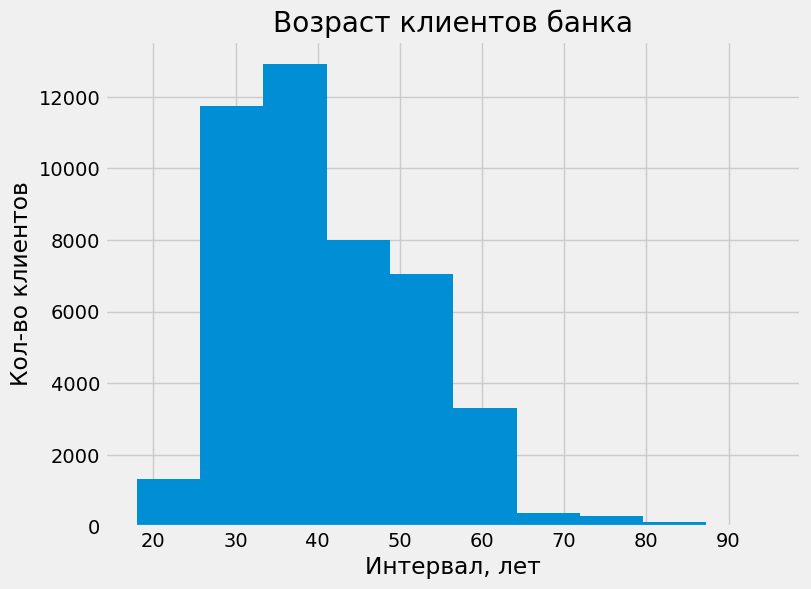

In [61]:
# Гистограмма в разрезе возраста
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

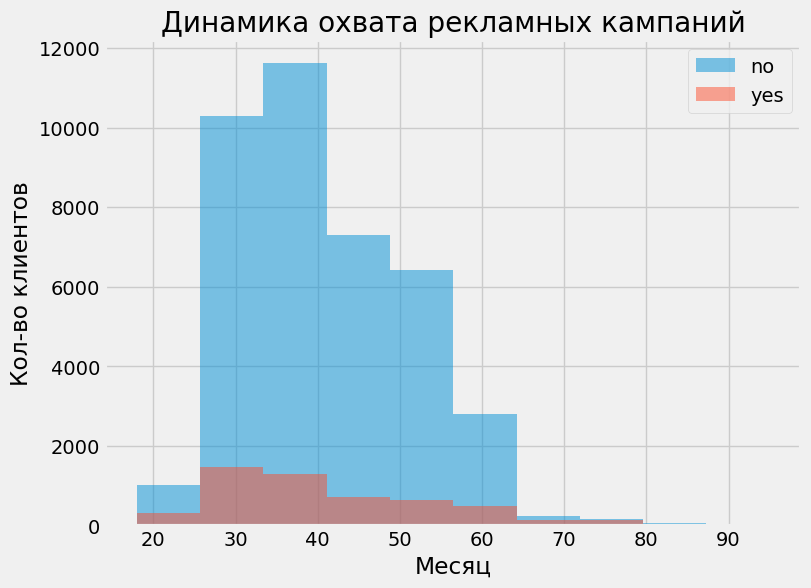

In [79]:
# Гистограмма по целевому признаку от возраста
plt.figure(figsize=(8, 6))
plt.hist(df['age'][df['y']=='no'], alpha=0.5, label='no');
plt.hist(df['age'][df['y']=='yes'], alpha=0.5, label='yes');
plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend();

**value_counts**

In [82]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

**apply**

In [86]:
df['convert'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

**groupby, sum**

In [93]:
# Сводная таблица количества клиентов банка по возрасту
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


**Диаграмма рассеивания**

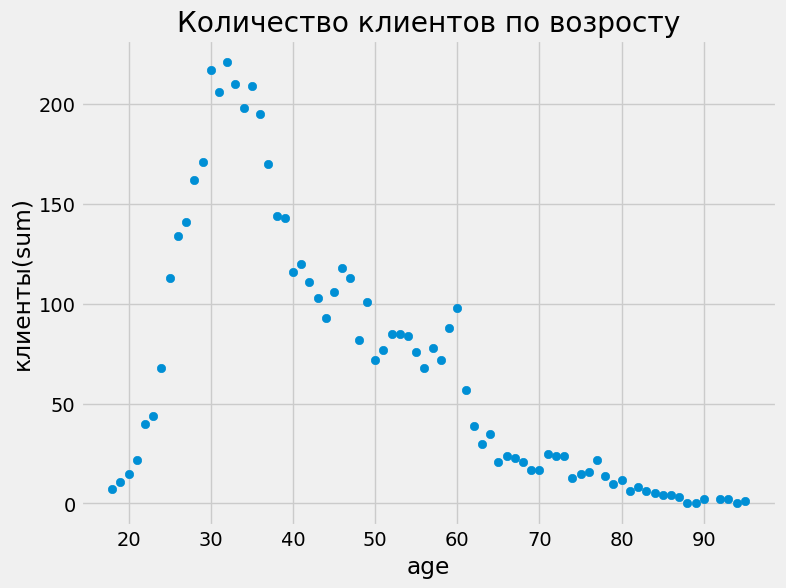

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['convert'])
plt.title('Количество клиентов по возросту')
plt.ylabel('клиенты(sum)')
plt.xlabel('age');

**boxplot**

In [97]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,convert
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0


In [105]:
data1 = df['duration'][df['y']=='yes']
data2 = df['duration'][df['y']=='no']

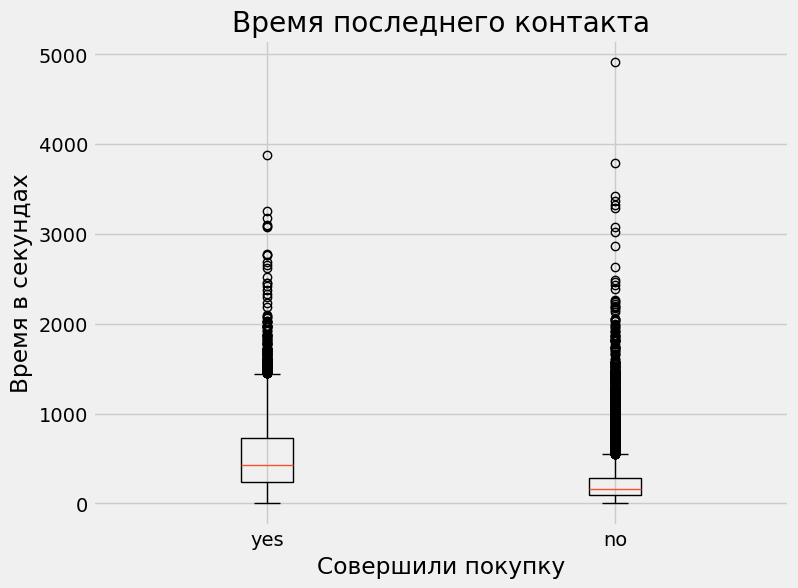

In [111]:
plt.figure(figsize=(8, 6))
plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

На графике видно много выбросов, строим боксплот без выбросов(аттрибут showfliers = False)

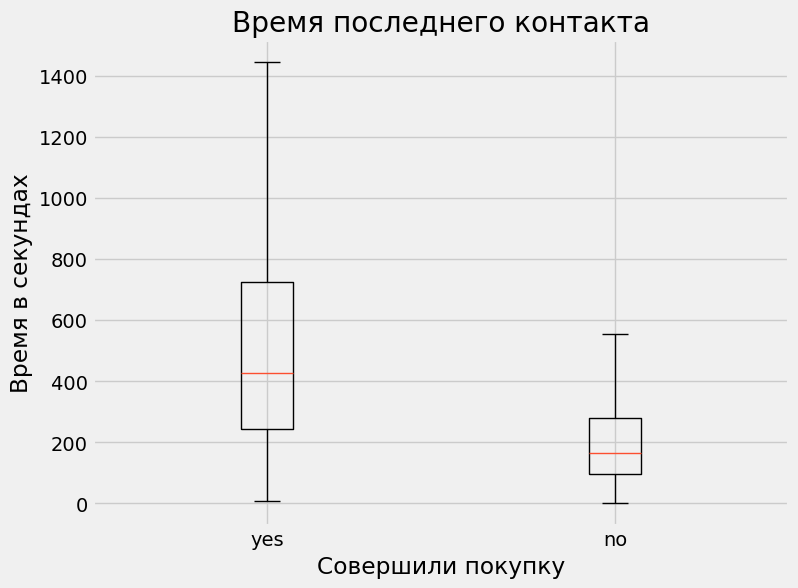

In [113]:
plt.figure(figsize=(8, 6))
plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

**Столбчатая диаграмма**

In [117]:
data = df['job'].value_counts().reset_index()
data

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154
5,retired,2264
6,self-employed,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


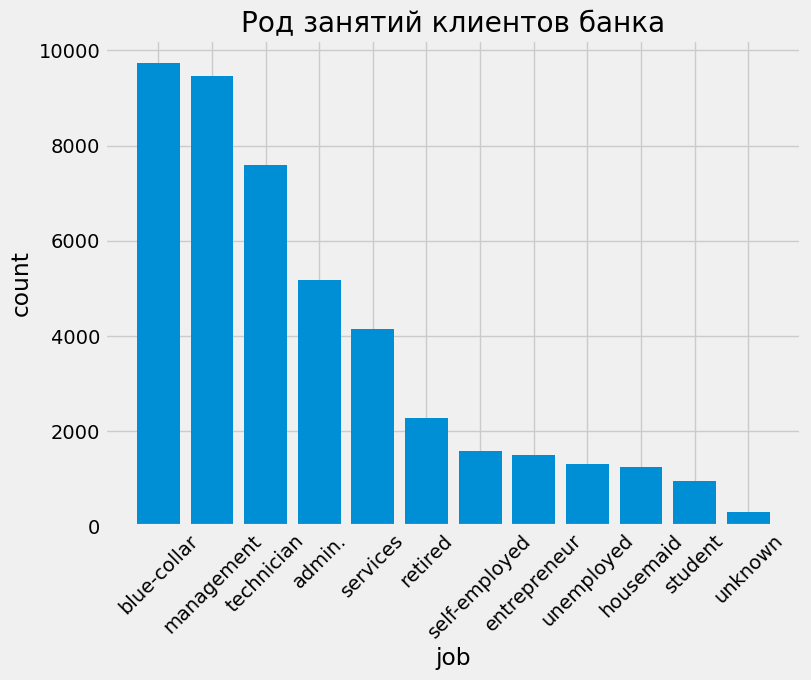

In [125]:
plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['count'])
plt.xlabel('job')
plt.ylabel('count')
plt.title('Род занятий клиентов банка')
plt.xticks(rotation=45); # Наклон подписей

**crosstab**

In [133]:
data = pd.crosstab(df['job'], df['y']).reset_index().sort_values(by='no', ascending=False)

**Столбчатая многорядная диграмма**

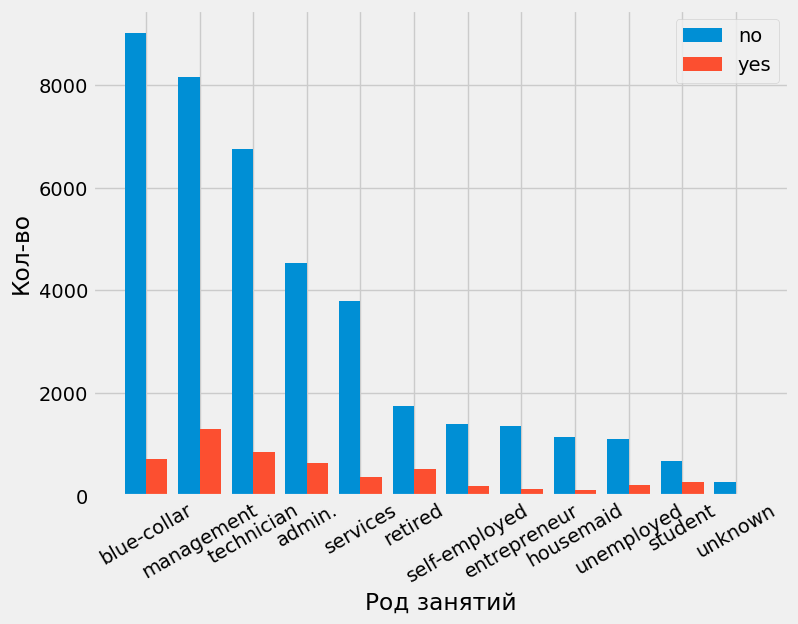

In [140]:
n_ticks = np.arange(len(data['no'])) # кол-во делений
offset = 0.2 # сдвиг
w = 0.4

plt.figure(figsize=(8, 6))

plt.bar(n_ticks-offset, data['no'], width=w, label='no')
plt.bar(n_ticks+offset, data['yes'], width=w, label='yes')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend()
plt.xticks(n_ticks, data['job'], rotation=30);